Source:
* [Geeks for Geeks - SARSA Reinforcement Learning](https://www.geeksforgeeks.org/sarsa-reinforcement-learning/)
* [Towards Data Science - Reinforcement learning: Temporal-Difference, SARSA, Q-Learning & Expected SARSA in python](https://towardsdatascience.com/reinforcement-learning-temporal-difference-sarsa-q-learning-expected-sarsa-on-python-9fecfda7467e)
* [A Name Not Yet Taken AB - SARSA Algorithm in Python](https://www.annytab.com/sarsa-algorithm-in-python/)

# Importing the required libraries

In [1]:
import numpy as np
import gym
import time
import math

# Building the environment

Environments preloaded into gym:
* [FrozenLake-v0](https://gym.openai.com/envs/FrozenLake-v0/)
* [Taxi-v3](https://gym.openai.com/envs/Taxi-v3/)

In [2]:
env_name = 'FrozenLake-v0'

env = gym.make(env_name)

# Defining utility functions to be used in the learning process

## Initialising Q

In [3]:
def init_Q(n_states, n_actions, init_Q_type="ones"):
    """
    @param n_states the number of states
    @param n_actions the number of actions
    @param type random, ones or zeros for the initialization
    """
    if init_Q_type == "ones":
        return np.ones((n_states, n_actions))
    elif init_Q_type == "random":
        return np.random.random((n_states, n_actions))
    elif init_Q_type == "zeros":
        return np.zeros((n_states, n_actions))

## Choose an action

In [4]:
# Numpy generator
rng = np.random.default_rng()  # Create a default Generator.

In [5]:
def epsilon_greedy(Q, state, n_actions, epsilon):
    """
    @param Q Q values {state, action} -> value
    @param epsilon for exploration
    @param n_actions number of actions
    @param state state at time t
    """
    if rng.uniform(0, 1) < epsilon:
        action = np.random.randint(0, n_actions)
        #action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

## Update Q-matrice (state-action value function)

In [6]:
# Function to learn the Q-value 
def update(state1, action1, reward1, state2, action2, expected=False):
    
    predict = Q[state1, action1] 
    
    target = reward1 + gamma * Q[state2, action2] 
    if expected:
        expected_value = np.mean(Q[state2,:])
        target = reward1 + gamma * expected_value
    
    Q[state1, action1] = Q[state1, action1] + alpha * (target - predict) 

## Updating parameters

### Epsilon $\epsilon$ - Exploration rate

In [ ]:
# Exploration rate

def get_epsilon(episode, init_epsilon, divisor=25):
    
    n_epsilon = init_epsilon/(episode/1000+1)
    # n_epsilon = min(1, 1.0 - math.log10((episode + 1) / divisor))
    
    return n_epsilon

### Alpha $\alpha$ - Learning rate

In [ ]:
# Learning rate

def get_alpha(episode, init_alpha, divisor=25):
    
    n_alpha = init_alpha/(episode/1000+1)
    # n_alpha = min(1.0, 1.0 - math.log10((episode + 1) / divisor))
    
    return n_alpha

# Initializing different parameters

In [ ]:
# Defining the different parameters 
init_epsilon = 0.2 # trade-off exploration/exploitation - better if decreasing
init_alpha = 0.2 # learning rate, better if decreasing

# Specific to environment
gamma = 0.95 # discount for future rewards (also called decay factor)
n_states = env.observation_space.n
n_actions = env.action_space.n

# Episodes
n_episodes = 1000000
nmax_steps = 100 # maximum steps per episode

# Initializing the Q-matrix 
Q = init_Q(n_states, n_actions, init_Q_type="zeros")

# Training the learning agent

In [ ]:
# Visualisation
render = True

In [ ]:
# Initializing the reward
evolution_reward = []

In [ ]:
# Starting the SARSA learning 
for episode in range(n_episodes):
    
    #print(f"Episode: {episode}")
    
    n_episode_steps = 0
    episode_reward = 0
    done = False
    
    state1 = env.reset()
    
    while (not done) and (n_episode_steps < nmax_steps):
        
        # Update parameters
        epsilon = get_epsilon(episode, init_epsilon)
        alpha = get_alpha(episode, init_alpha)
        
        # Choose an action
        action1 = epsilon_greedy(Q, state1, n_actions, epsilon)
        
        # Visualizing the training
        #if render:
        #    env.render() 
        
        # Getting the next state 
        state2, reward1, done, info = env.step(action1)
        episode_reward += reward1
  
        # Q-Learning
        # Choosing the next action 
        action2 = np.argmax(Q[state2, :])
        # Learning the Q-value 
        update(state1, action1, reward1, state2, action2)
  
        # Updating the respective vaLues 
        state1 = state2 
        # /!\ action2 will become action1 in SARSA (we don't do another action) but not for Q-Learning.
        # Maybe need to separate the functions
        n_episode_steps += 1
        
    # At the end of learning process 
    if render:
        #print(f"This episode took {n_episode_steps} timesteps and reward {episode_reward}")
        print('Episode {0}, Score: {1}, Timesteps: {2}, Epsilon: {3}, Alpha: {4}'.format(
            episode+1, episode_reward, n_episode_steps, epsilon, alpha))
    
    evolution_reward.append(episode_reward)

For FrozenLake-v0: In the above output, the red mark determines the current position of the agent in the environment while the direction given in brackets gives the direction of movement that the agent will make next. Note that the agent stays at it’s position if goes out of bounds.

# Evaluating the performance

## Mean reward

In [ ]:
# Evaluating the performance 
print ("Performace : ", sum(evolution_reward)/n_episodes) 

# Visualizing the Q-matrix 
print(Q) 

In [35]:
import numpy as np
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

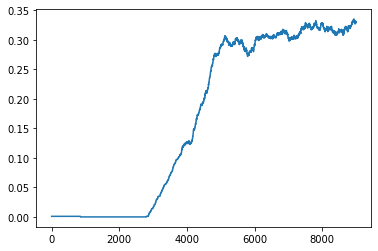

In [37]:
import numpy as np
import matplotlib.pyplot as plt

y = running_mean(evolution_reward,1000)
x = range(len(y))
plt.plot(x, y)

## Evaluation through episode

In [ ]:
# Variables
episodes = 1000
nmax_steps = 200
total_reward = 0

In [ ]:
# Loop episodes
for episode in range(episodes):

    n_episode_steps = 0
    episode_reward = 0
    done = False
    
    # Start episode and get initial observation
    state = env.reset()
    
    while (not done) and (n_episode_steps < nmax_steps):

        # Get an action (0:Left, 1:Down, 2:Right, 3:Up)
        action = np.argmax(Q[state,:])

        # Perform a step
        state, reward, done, info = env.step(action)

        # Update score
        episode_reward += reward
        total_reward += reward

        n_episode_steps += 1
        
    print('Episode {0}, Score: {1}, Timesteps: {2}'.format(
        episode+1, episode_reward, n_episode_steps))


# Close the environment
env.close()

# Print the score
print('--- Evaluation ---')
print ('Score: {0} / {1}'.format(total_reward, episodes))
print()